Fake News Detection
=

**AI ML Intern**
Build a Fake News Detection Model Using Mechine Learning
-

**Import Relevent Libraries/Modules**

**Basic EDA**

**Model Building**
  - Seperate your Independent and Dependent
  - Split your Data into Train and Test
  - Model Selection
  - Model Traning 
  - Model Evalution


Import Relevent Libraries/Modules
-

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Importing datasets
-

In [2]:
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')


In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
#to delete the 10 last rows from both the data

In [8]:
df_fake_manual_testing = df_fake.tail(10).copy()
df_fake = df_fake.iloc[:-10]

df_true_manual_testing = df_true.tail(10).copy()
df_true = df_true.iloc[:-10]


In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [10]:
df_fake_manual_testing['class'] = 0
df_true_manual_testing['class'] = 0

In [11]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [13]:
df_merge = pd.concat([df_fake ,df_true] , axis = 0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
#mearge the two columns of data frame

In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

<Axes: >

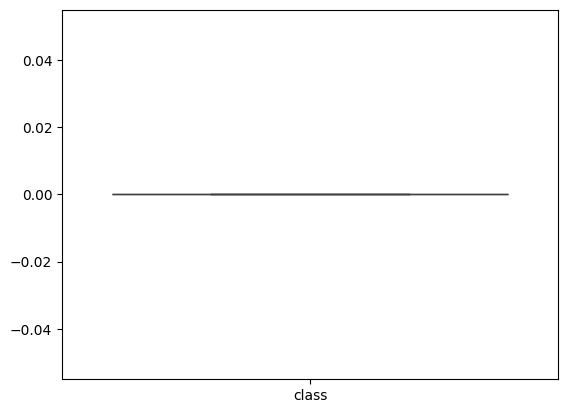

In [17]:
sns.boxplot(df_fake)

<Axes: >

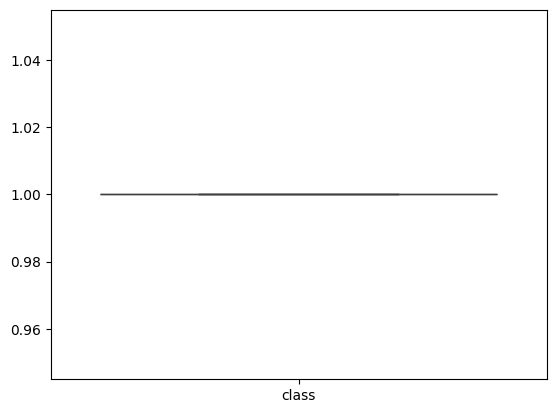

In [18]:
sns.boxplot(df_true)

In [ ]:
#Removing data which is not required

In [19]:
df = df_merge.drop(['title', 'subject', 'date'], axis = 1)

Missing Data
-

In [20]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
#Random Shuffiling of the data frame

In [21]:
df = df.sample(frac = 1)

In [22]:
df.head()

,text,class
13501,"DERA ISMAIL KHAN, Pakistan (Reuters) - A suspe...",1
16772,Some great news on the carbon emissions rule! ...,0
8121,Ted Cruz is one of the most extreme individual...,0
3441,BERLIN (Reuters) - German Environment Minister...,1
13274,We love AP Reporter Matt Lee! He is a lone voi...,0


In [24]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [25]:
df.columns

Index(['text', 'class'], dtype='object')

In [26]:
df.head()

,text,class
0,"DERA ISMAIL KHAN, Pakistan (Reuters) - A suspe...",1
1,Some great news on the carbon emissions rule! ...,0
2,Ted Cruz is one of the most extreme individual...,0
3,BERLIN (Reuters) - German Environment Minister...,1
4,We love AP Reporter Matt Lee! He is a lone voi...,0


<Axes: >

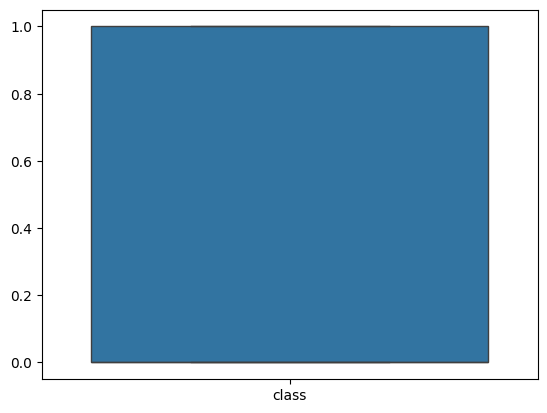

In [27]:
sns.boxplot(df)

Splitting the Independent and Dependent Data
-


In [28]:
x = df['text']
y = df['class']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)


Logistic Regression
-

In [31]:
lr = LogisticRegression()
lr.fit(xv_train, y_train)

LogisticRegression()

In [32]:
pred_lr = lr.predict(xv_test)
lr.score(xv_test, y_test)

0.9877005347593583

In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5875
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Dcision Tree Classifier
-

In [34]:
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dt = dt.predict(xv_test)

In [36]:
dt.score(xv_test, y_test)

0.9945632798573975

In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5875
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Gradient Boosting Classifier
-

In [38]:
GB = GradientBoostingClassifier(random_state= 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
predit_gb = GB.predict(xv_test)

In [40]:
GB.score(xv_test, y_test)

0.9958110516934047

In [41]:
print(classification_report(y_test, predit_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5875
           1       0.99      1.00      1.00      5345

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Random Forest
-

In [42]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
pred_rf = rf.predict(xv_test)

In [44]:
rf.score(xv_test, y_test)

0.9899286987522281

In [45]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5875
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [46]:
def output_label(n):

  if n == 0:
    return "It is fake news"
  else:
    return "It is real news"


**manual_testing(news)**: This function simulates manual testing of the model on a new piece of news

- Now use the **pre-trained machine learning** models to predict the category of the news
- Loading and fitting of the machine learning models **(lr, dt, GB, rf)**

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def wordopt(text):
    # Your word optimization logic here
    return text.lower().strip()

def preprocess_news(news):
    # Preprocess the input news
    testing_news = {"text": [news]}
    preprocessed_news = pd.DataFrame(testing_news)
    preprocessed_news["text"] = preprocessed_news["text"].apply(wordopt)
    return preprocessed_news

def manual_testing(news):
    preprocessed_news = preprocess_news(news)
    new_x_test = preprocessed_news["text"]

    # Create a TfidfVectorizer object
    vectorization = TfidfVectorizer()
    vectorization.fit(x_train)  # Fit the vectorizer on your training data
    new_xv_test = vectorization.transform(new_x_test)

    # Make predictions using different models
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_gb = GB.predict(new_xv_test)
    pred_rf = rf.predict(new_xv_test)

    # Return the predictions in a formatted string
    return f"\nlr Prediction: {output_label(pred_lr[0])}\ndt Prediction: {output_label(pred_dt[0])}\nGB Prediction: {output_label(pred_gb[0])}\nrf Prediction: {output_label(pred_rf[0])}"

news = str(input())
manual_testing(news)


 Ukraine says troops advancing further in Russia, as BBC told UK tanks used in incursion


'\nlr Prediction: It is fake news\ndt Prediction: It is fake news\nGB Prediction: It is fake news\nrf Prediction: It is fake news'